In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

* The dataset describe the chemical properties of glass and involves classifying samples of glass using their chemical properties as 1 of 6 class.The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified

* There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

* Attribute Information-
    ID number, Refractive index, Sodium, magnesium, Aluminium, Silicon, Potassium, Calcium, Barium, Iron, 
 
* And my target variable is Type of glass

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv",header=None,names=['ID number','Refractive index','Na: sodium','Magnesium','Aluminium','Silicon','Potassium','Calcium','Barium','Fe:Iron','Type of Glass'])
df

,ID number,Refractive index,Na: sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Fe:Iron,Type of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.dtypes

ID number             int64
Refractive index    float64
Na: sodium          float64
Magnesium           float64
Aluminium           float64
Silicon             float64
Potassium           float64
Calcium             float64
Barium              float64
Fe:Iron             float64
Type of Glass         int64
dtype: object

In [4]:
df.isnull().sum()

ID number           0
Refractive index    0
Na: sodium          0
Magnesium           0
Aluminium           0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Fe:Iron             0
Type of Glass       0
dtype: int64

In [5]:
df.nunique().to_frame('unique values')

,unique values
ID number,214
Refractive index,178
Na: sodium,142
Magnesium,94
Aluminium,118
Silicon,133
Potassium,65
Calcium,143
Barium,34
Fe:Iron,32


In [6]:
df.drop('ID number',axis=1,inplace=True)

I can drop ID number because id number is not very imp for fitting and predict this data

In [7]:
df['Type of Glass'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

# Description of dataset

In [8]:
df.describe()

,Refractive index,Na: sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Fe:Iron,Type of Glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


This gives the statistical information of the numerical column.

From the above description we can observe the following:

The count of all the columns are same means there are no missing values present in the dataset.
    1. The mean value is greater then the median in Calcium, Barium, Type of glass, means the data is skewed in right side 
    2. The data in the column Magnesium, silicon, potassium,  means the data is skewed in left side 

we can observe there is a difference between 75% and max in some columns hence there are outlyers are present in the data

# Univariant Analysis

1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: Refractive index, Length: 178, dtype: int64


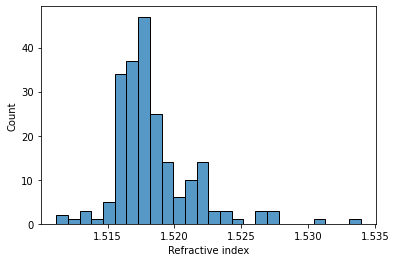

In [9]:
sns.histplot(x='Refractive index',data=df)
print(df['Refractive index'].value_counts())

13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na: sodium, Length: 142, dtype: int64


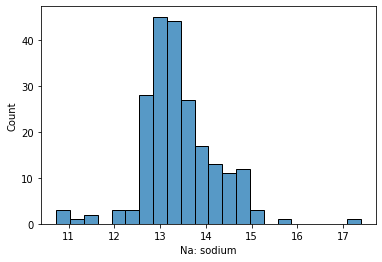

In [10]:
sns.histplot(x='Na: sodium',data=df)
print(df['Na: sodium'].value_counts())

0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Magnesium, Length: 94, dtype: int64


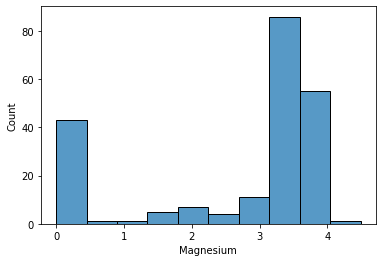

In [11]:
sns.histplot(x='Magnesium',data=df)
print(df['Magnesium'].value_counts())

1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Aluminium, Length: 118, dtype: int64


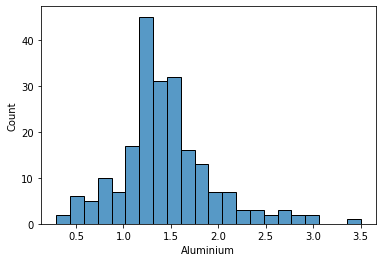

In [12]:
sns.histplot(x='Aluminium',data=df)
print(df['Aluminium'].value_counts())

72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Silicon, Length: 133, dtype: int64


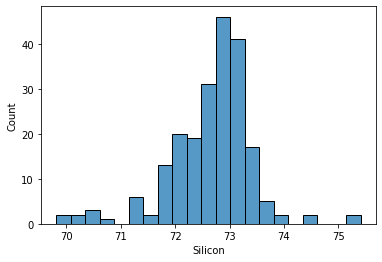

In [13]:
sns.histplot(x='Silicon',data=df)
print(df['Silicon'].value_counts())

0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: Potassium, Length: 65, dtype: int64


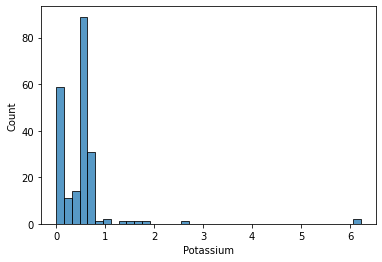

In [14]:
sns.histplot(x='Potassium',data=df)
print(df['Potassium'].value_counts())

8.03    5
8.43    5
9.57    4
8.79    4
8.44    4
       ..
9.23    1
8.90    1
9.13    1
8.09    1
8.62    1
Name: Calcium, Length: 143, dtype: int64


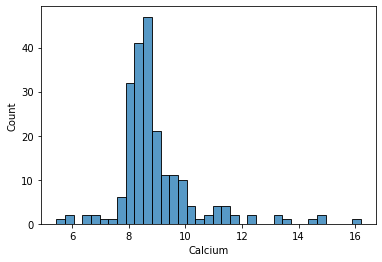

In [15]:
sns.histplot(x='Calcium',data=df)
print(df['Calcium'].value_counts())

0.00    176
0.64      2
1.57      2
0.09      2
1.59      2
0.11      2
3.15      1
0.81      1
1.64      1
1.06      1
0.54      1
2.88      1
1.38      1
1.55      1
0.67      1
1.71      1
0.56      1
0.63      1
0.53      1
0.66      1
0.61      1
0.27      1
0.69      1
0.40      1
0.14      1
0.76      1
1.68      1
1.63      1
1.19      1
0.24      1
2.20      1
0.15      1
0.06      1
1.67      1
Name: Barium, dtype: int64


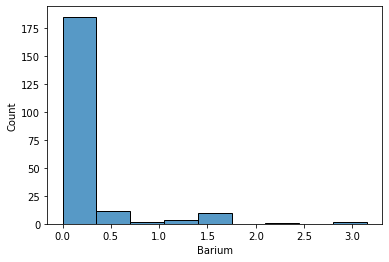

In [16]:
sns.histplot(x='Barium',data=df)
print(df['Barium'].value_counts())

0.00    144
0.24      7
0.17      7
0.09      6
0.10      5
0.11      4
0.16      3
0.28      3
0.12      3
0.22      3
0.14      3
0.07      3
0.19      2
0.15      2
0.08      2
0.06      1
0.21      1
0.05      1
0.51      1
0.37      1
0.35      1
0.25      1
0.18      1
0.34      1
0.29      1
0.30      1
0.20      1
0.32      1
0.26      1
0.03      1
0.31      1
0.01      1
Name: Fe:Iron, dtype: int64


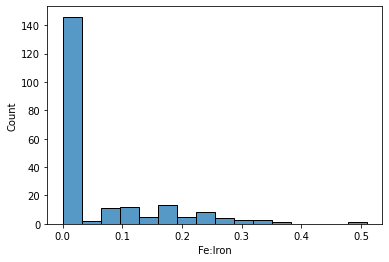

In [17]:
sns.histplot(x='Fe:Iron',data=df)
print(df['Fe:Iron'].value_counts())

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of Glass, dtype: int64


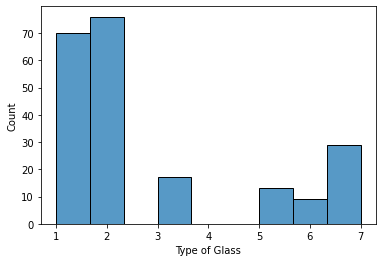

In [18]:
sns.histplot(x='Type of Glass',data=df)
print(df['Type of Glass'].value_counts())

# Bivariant Analysis

<AxesSubplot:>

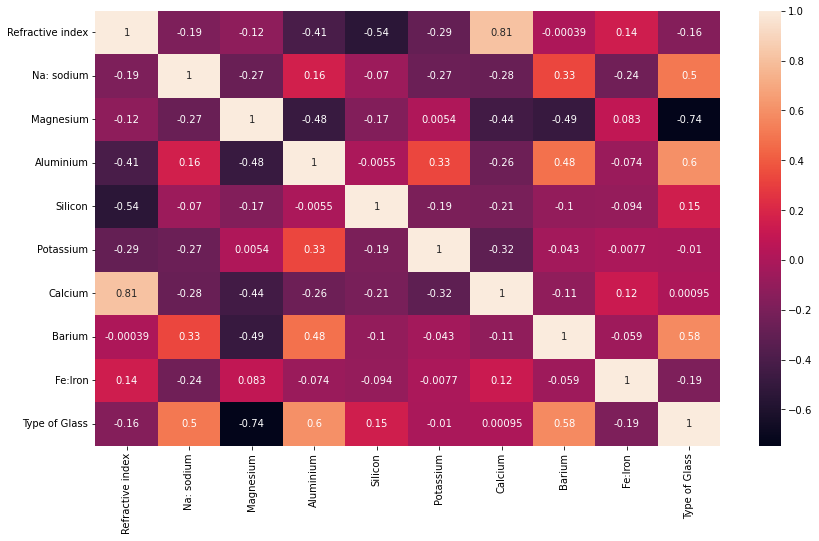

In [19]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Refractive index', ylabel='Silicon'>

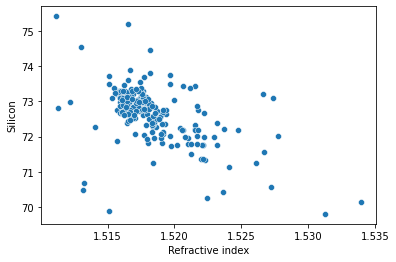

In [20]:
sns.scatterplot(x='Refractive index',y='Silicon',data=df)


silicon is increased Refractive index is automaticly decreased they have negatively corelated with each other

<AxesSubplot:xlabel='Refractive index', ylabel='Calcium'>

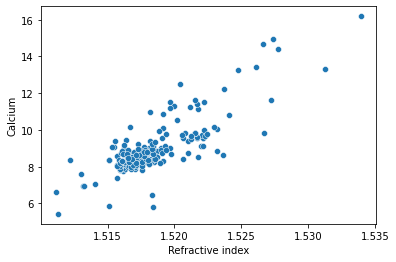

In [21]:
sns.scatterplot(x='Refractive index',y='Calcium',data=df)


Refractive index is increased Calcium is automaticly increased they have positively corelated with each other

<AxesSubplot:xlabel='Calcium', ylabel='Na: sodium'>

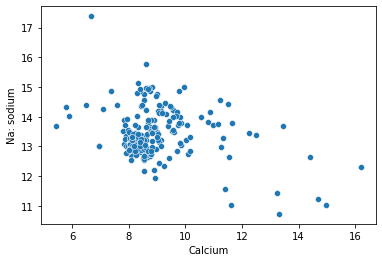

In [22]:
sns.scatterplot(x='Calcium',y='Na: sodium',data=df)

Na: sodium is increased Calcium is automaticly decreased they have negatively corelated with each other

<AxesSubplot:xlabel='Aluminium', ylabel='Barium'>

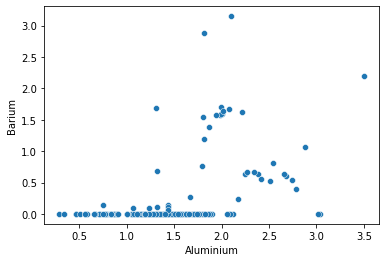

In [23]:
sns.scatterplot(x='Aluminium',y='Barium',data=df)

Aluminium are increased Barium are also increased they have positively corelated with each other

<AxesSubplot:xlabel='Type of Glass', ylabel='Barium'>

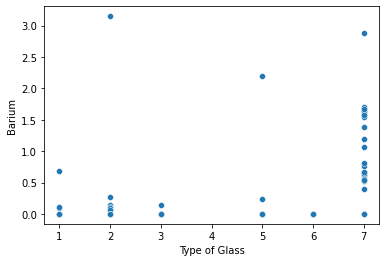

In [24]:
sns.scatterplot(y='Barium',x='Type of Glass',data=df)

Barium and Type of glass are highly corelated with each other

<AxesSubplot:xlabel='Type of Glass', ylabel='Refractive index'>

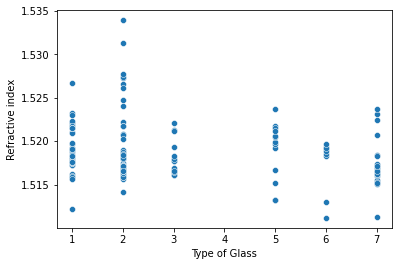

In [25]:
sns.scatterplot(y='Refractive index',x='Type of Glass',data=df)

Refractive index and Type of Glass are negatively corelated with each other

<AxesSubplot:xlabel='Type of Glass', ylabel='Na: sodium'>

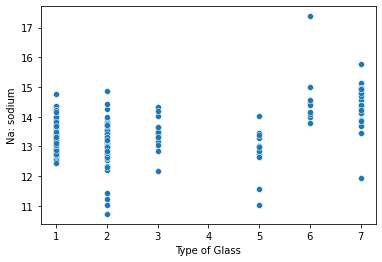

In [26]:
sns.scatterplot(y='Na: sodium',x='Type of Glass',data=df)

<AxesSubplot:xlabel='Type of Glass', ylabel='Magnesium'>

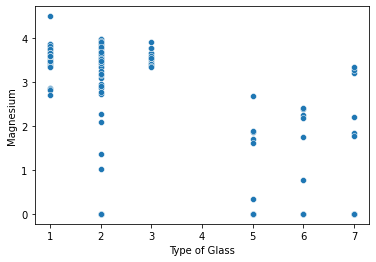

In [27]:
sns.scatterplot(y='Magnesium',x='Type of Glass',data=df)

Magnesium and Type of Glass are highly negatively corelated with each other

<AxesSubplot:xlabel='Type of Glass', ylabel='Potassium'>

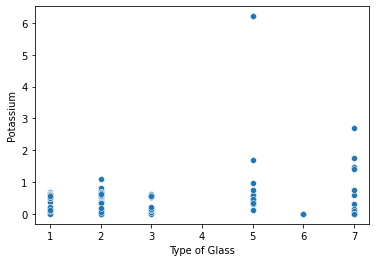

In [28]:
sns.scatterplot(y='Potassium',x='Type of Glass',data=df)

very less negative corelated with each other

<AxesSubplot:xlabel='Type of Glass', ylabel='Aluminium'>

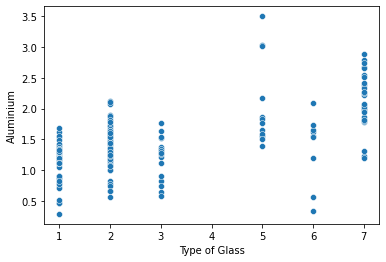

In [29]:
sns.scatterplot(y='Aluminium',x='Type of Glass',data=df)

Aluminium and target variable are highly corelated with each other

<AxesSubplot:xlabel='Type of Glass', ylabel='Silicon'>

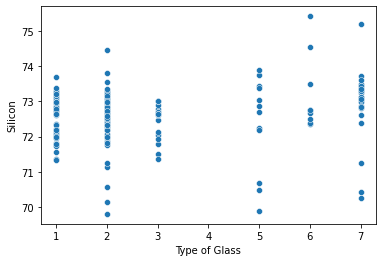

In [30]:
sns.scatterplot(y='Silicon',x='Type of Glass',data=df)

Silicon and target variable are less positive corelated with each other

<AxesSubplot:xlabel='Type of Glass', ylabel='Calcium'>

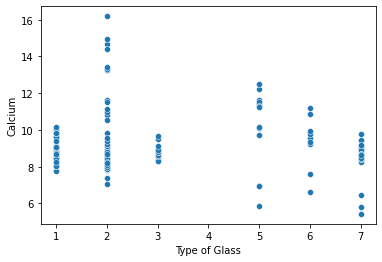

In [31]:
sns.scatterplot(y='Calcium',x='Type of Glass',data=df)

very less positive corelated with each other

<AxesSubplot:xlabel='Type of Glass', ylabel='Fe:Iron'>

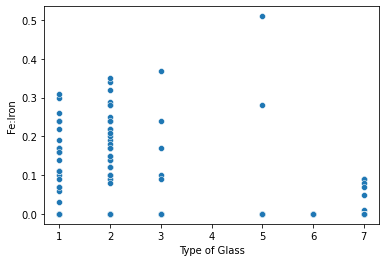

In [32]:
sns.scatterplot(y='Fe:Iron',x='Type of Glass',data=df)

Fe:iron and Type of Glass are less negative corelated with each other

# Multivariant Analysis

<Figure size 1152x432 with 0 Axes>

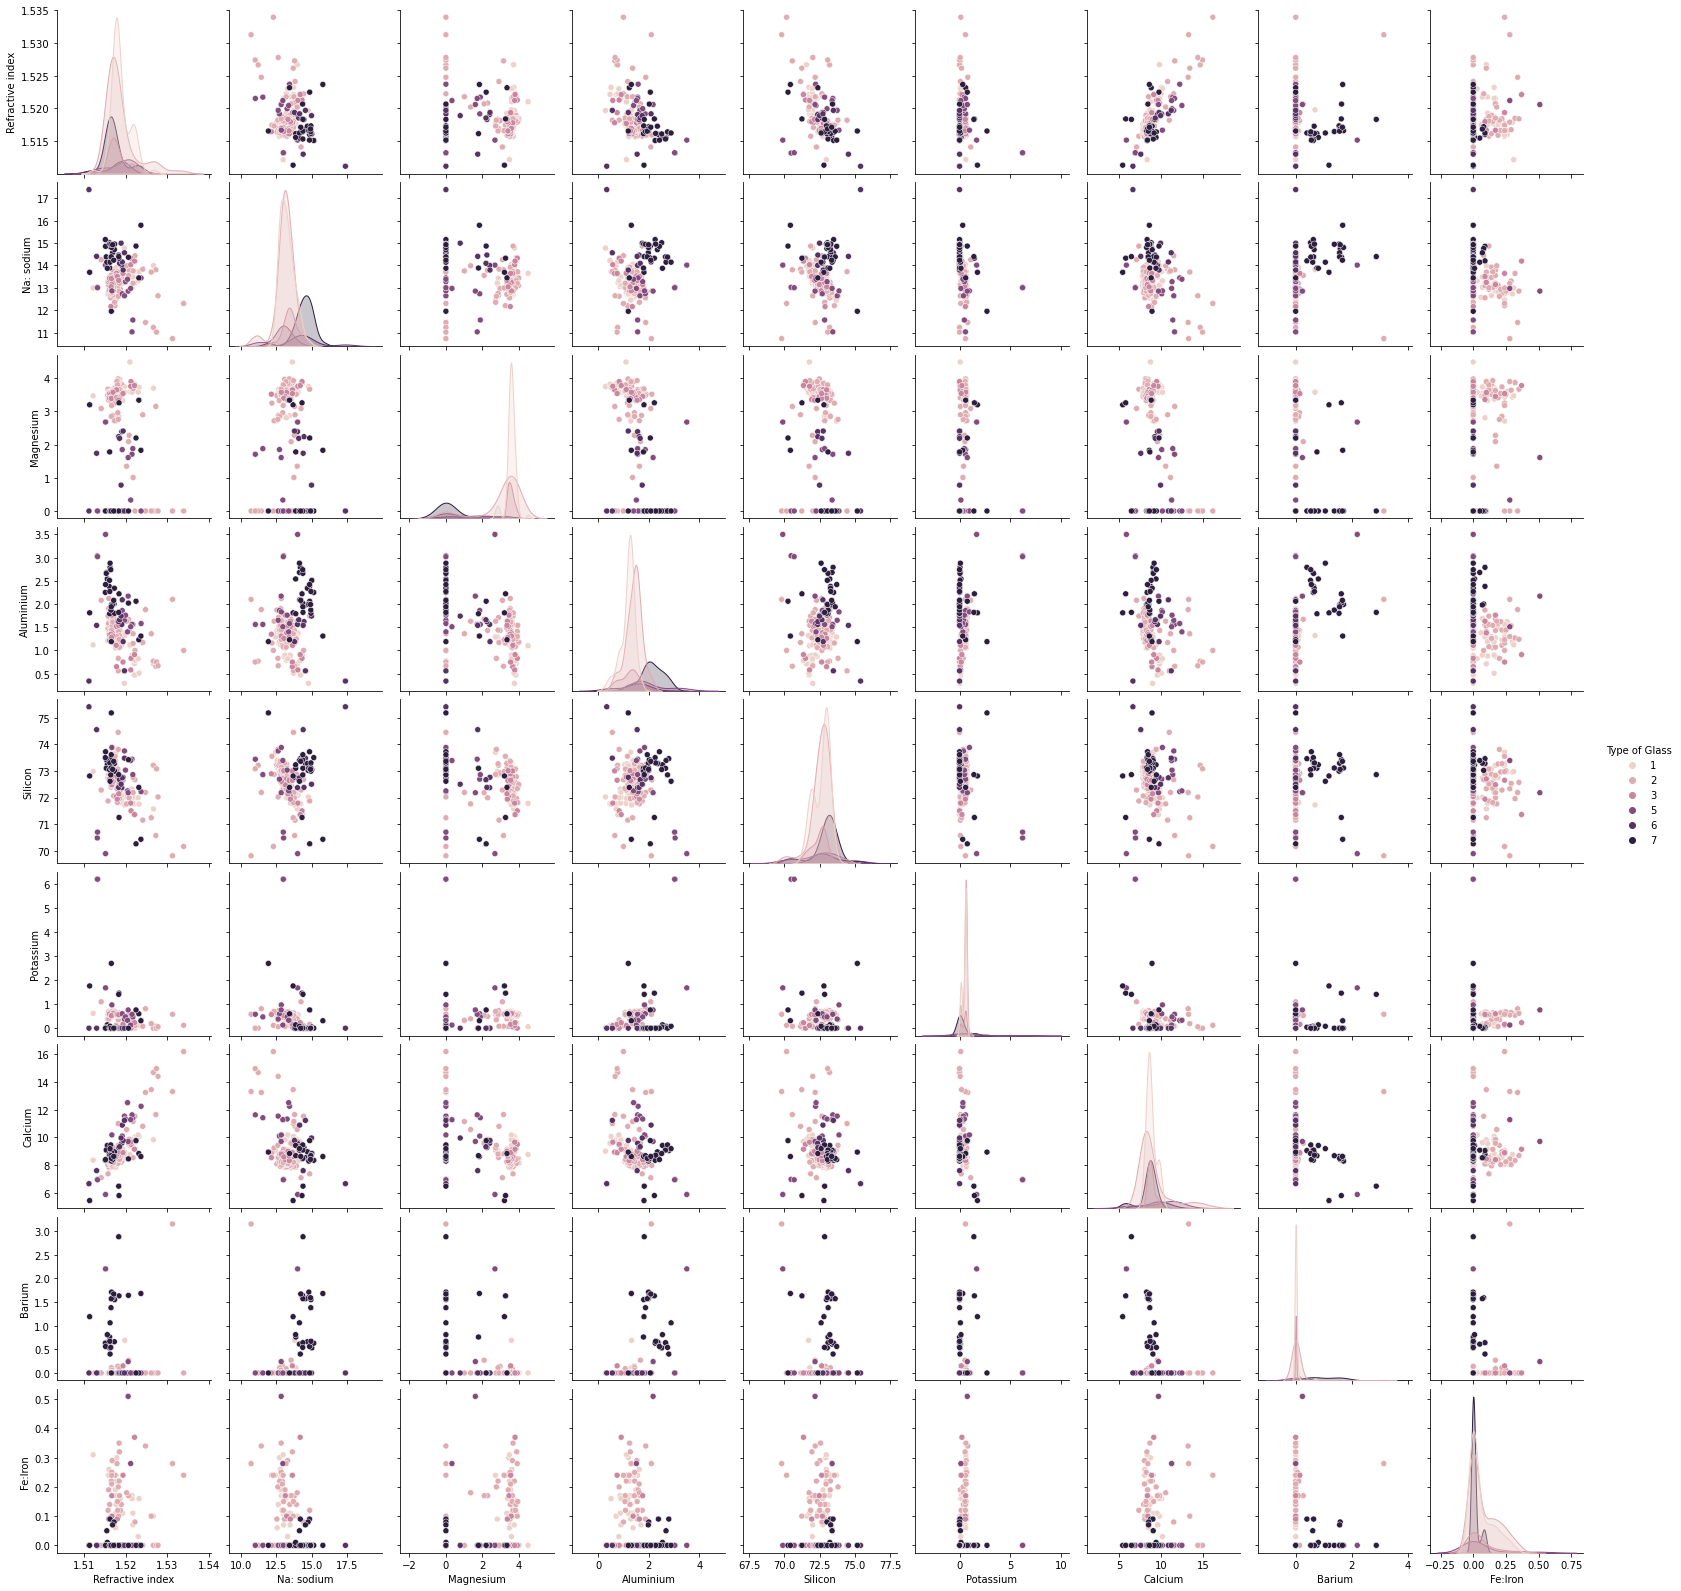

In [33]:
plt.figure(figsize=(16,6))
sns.pairplot(df,hue='Type of Glass')


# Checking Skewness And Remove It

In [34]:
df.skew()

Refractive index    1.625431
Na: sodium          0.454181
Magnesium          -1.152559
Aluminium           0.907290
Silicon            -0.730447
Potassium           6.551648
Calcium             2.047054
Barium              3.416425
Fe:Iron             1.754327
Type of Glass       1.114915
dtype: float64

we can remove skewness through cube root

In [35]:
from scipy.stats import skew

In [36]:
df['Potassium']=np.cbrt(df['Potassium'])
df['Refractive index']=np.cbrt(df['Refractive index'])
df['Aluminium']=np.cbrt(df['Aluminium'])
#df['Type of Glass']=np.cbrt(df['Type of Glass'])
df['Fe:Iron']=np.cbrt(df['Fe:Iron'])
df['Calcium']=np.cbrt(df['Calcium'])
df['Barium']=np.cbrt(df['Barium'])

In [37]:
df.skew()

Refractive index    1.617049
Na: sodium          0.454181
Magnesium          -1.152559
Aluminium          -0.204132
Silicon            -0.730447
Potassium          -0.591896
Calcium             1.407358
Barium              2.073007
Fe:Iron             0.894683
Type of Glass       1.114915
dtype: float64

i am not remove skewness on silicon or magnessium column because if i can remove the skewness of that column it cannot decreased 

In [38]:
df['Barium']=np.cbrt(df['Barium'])
df['Fe:Iron']=np.cbrt(df['Fe:Iron'])
df['Calcium']=np.cbrt(df['Calcium'])
df['Refractive index']=np.cbrt(df['Refractive index'])

In [39]:
df.skew()

Refractive index    1.614260
Na: sodium          0.454181
Magnesium          -1.152559
Aluminium          -0.204132
Silicon            -0.730447
Potassium          -0.591896
Calcium             1.181876
Barium              1.756306
Fe:Iron             0.762576
Type of Glass       1.114915
dtype: float64

# Removing Outlyers

Refractive index       AxesSubplot(0.125,0.749828;0.227941x0.130172)
Na: sodium          AxesSubplot(0.398529,0.749828;0.227941x0.130172)
Magnesium           AxesSubplot(0.672059,0.749828;0.227941x0.130172)
Aluminium              AxesSubplot(0.125,0.593621;0.227941x0.130172)
Silicon             AxesSubplot(0.398529,0.593621;0.227941x0.130172)
Potassium           AxesSubplot(0.672059,0.593621;0.227941x0.130172)
Calcium                AxesSubplot(0.125,0.437414;0.227941x0.130172)
Barium              AxesSubplot(0.398529,0.437414;0.227941x0.130172)
Fe:Iron             AxesSubplot(0.672059,0.437414;0.227941x0.130172)
Type of Glass          AxesSubplot(0.125,0.281207;0.227941x0.130172)
dtype: object

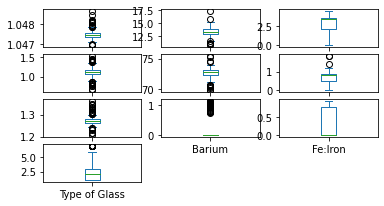

In [40]:
df.plot(kind='box',subplots=True,layout=(5,3))

With the help of boxplot we can see the outlyers are present in some columns now we can remove the outlyers with the help of Zscore

In [41]:
from scipy.stats import zscore
z= np.abs(zscore(df))
z

,Refractive index,Na: sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Fe:Iron,Type of Glass
0,0.874320,0.284953,1.254639,0.634449,1.127082,0.835901,0.093752,0.461130,0.694918,0.848275
1,0.248857,0.591817,0.636168,0.057329,0.102319,0.346205,0.854001,0.461130,0.694918,0.848275
2,0.721921,0.149933,0.601422,0.300216,0.438787,0.188105,0.897556,0.461130,0.694918,0.848275
3,0.232324,0.242853,0.698710,0.204901,0.052974,0.485589,0.522510,0.461130,0.694918,0.848275
4,0.311689,0.169205,0.650066,0.313611,0.555256,0.455958,0.648318,0.461130,0.694918,0.848275
...,...,...,...,...,...,...,...,...,...,...
209,0.705373,0.898681,1.865511,2.344370,0.052974,0.716931,0.237465,2.263954,0.694918,2.010478
210,0.500226,1.856097,1.865511,1.086101,0.529374,2.018006,0.374207,2.389531,0.694918,2.010478
211,0.755501,1.168721,1.865511,1.134079,0.995252,2.018006,0.341635,2.399355,0.694918,2.010478
212,0.612717,1.193270,1.865511,1.005054,1.241133,2.018006,0.309200,2.385524,0.694918,2.010478


In [42]:
threshold=3
print(np.where(z>3))

(array([ 21, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112, 163, 163,
       171, 172, 184, 184, 184, 185, 188, 201], dtype=int64), array([3, 0, 1, 4, 0, 4, 6, 6, 6, 0, 6, 3, 4, 5, 5, 1, 3, 4, 6, 4, 4],
      dtype=int64))


In [43]:
df1=df[(z<3).all(axis=1)]
df1

,Refractive index,Na: sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Fe:Iron,Type of Glass
0,1.047700,13.64,4.49,1.032280,71.78,0.391487,1.272529,0.000000,0.0,1
1,1.047439,13.89,3.60,1.107932,72.73,0.782974,1.256918,0.000000,0.0,1
2,1.047330,13.53,3.55,1.154800,72.99,0.730614,1.256023,0.000000,0.0,1
3,1.047443,13.21,3.69,1.088587,72.61,0.829134,1.263725,0.000000,0.0,1
4,1.047425,13.27,3.62,1.074337,73.08,0.819321,1.261141,0.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.047334,14.14,0.00,1.422757,72.61,0.430887,1.279330,1.006495,0.0,7
210,1.047381,14.92,0.00,1.257818,73.06,0.000000,1.266770,1.052877,0.0,7
211,1.047672,14.36,0.00,1.264107,73.42,0.000000,1.267439,1.056505,0.0,7
212,1.047355,14.38,0.00,1.247194,73.61,0.000000,1.268105,1.051397,0.0,7


In [44]:
print('Data with Outlyers:',df.shape)
print('Data without Outlyers:',df1.shape)

Data with Outlyers: (214, 10)
Data without Outlyers: (201, 10)


# checking corelation between features and target¶

In [45]:
df1.corr()['Type of Glass'].sort_values(ascending=False)

Type of Glass       1.000000
Barium              0.686029
Aluminium           0.596604
Na: sodium          0.567855
Silicon             0.209976
Calcium             0.118504
Refractive index   -0.109244
Fe:Iron            -0.170851
Potassium          -0.621037
Magnesium          -0.806372
Name: Type of Glass, dtype: float64

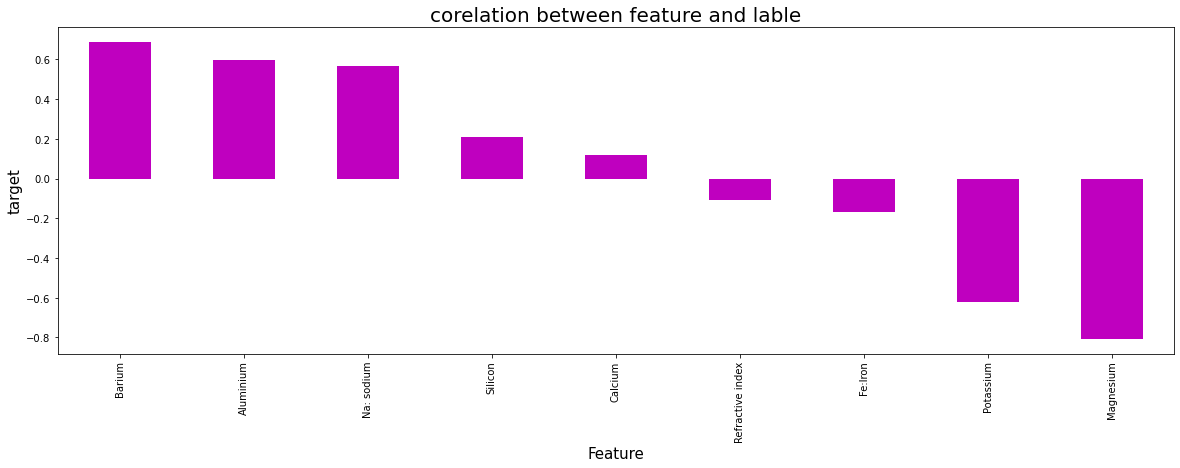

In [46]:
plt.figure(figsize=(20,6))
df1.corr()['Type of Glass'].sort_values(ascending=False).drop(['Type of Glass']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize= 15)
plt.ylabel('target',fontsize= 15)
plt.title('corelation between feature and lable',fontsize=20)
plt.show()

Visualizing Positive and Negative corelation between features and target.Here the feature Calcium has very less corelated with target variable 

# Seprating Feature and Target Variable

In [47]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x

,Refractive index,Na: sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Fe:Iron
0,1.047700,13.64,4.49,1.032280,71.78,0.391487,1.272529,0.000000,0.0
1,1.047439,13.89,3.60,1.107932,72.73,0.782974,1.256918,0.000000,0.0
2,1.047330,13.53,3.55,1.154800,72.99,0.730614,1.256023,0.000000,0.0
3,1.047443,13.21,3.69,1.088587,72.61,0.829134,1.263725,0.000000,0.0
4,1.047425,13.27,3.62,1.074337,73.08,0.819321,1.261141,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,1.047334,14.14,0.00,1.422757,72.61,0.430887,1.279330,1.006495,0.0
210,1.047381,14.92,0.00,1.257818,73.06,0.000000,1.266770,1.052877,0.0
211,1.047672,14.36,0.00,1.264107,73.42,0.000000,1.267439,1.056505,0.0
212,1.047355,14.38,0.00,1.247194,73.61,0.000000,1.268105,1.051397,0.0


In [48]:
y.head

<bound method NDFrame.head of 0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type of Glass, Length: 214, dtype: int64>

now our features and target variable are seperated

# Feature Scaling Using Standard Scaler

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
st = MinMaxScaler()
x = st.fit_transform(x)
x = pd.DataFrame(x)
x


,0,1,2,3,4,5,6,7,8
0,0.434469,0.437594,1.000000,0.432481,0.351786,0.212987,0.421849,0.000000,0.0
1,0.284936,0.475188,0.801782,0.520819,0.521429,0.425974,0.321619,0.000000,0.0
2,0.221955,0.421053,0.790646,0.575548,0.567857,0.397488,0.315877,0.000000,0.0
3,0.287137,0.372932,0.821826,0.498231,0.500000,0.451088,0.365322,0.000000,0.0
4,0.276571,0.381955,0.806236,0.481591,0.583929,0.445749,0.348736,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.224158,0.512782,0.000000,0.888441,0.500000,0.234423,0.465516,0.886021,0.0
210,0.251470,0.630075,0.000000,0.695841,0.580357,0.000000,0.384874,0.926850,0.0
211,0.418650,0.545865,0.000000,0.703185,0.644643,0.000000,0.389168,0.930044,0.0
212,0.236494,0.548872,0.000000,0.683435,0.678571,0.000000,0.393445,0.925548,0.0


Now our data have been standard and every features must have equal importance

In [51]:
y.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of Glass, dtype: int64

Our Target Variable will not balanced now we will balanced the data using Over Sampling Method

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [54]:
y.value_counts()

1    76
2    76
3    76
5    76
6    76
7    76
Name: Type of Glass, dtype: int64

Now our target variable will be balanced 

# Now we go for Data Modeling

# Finding Best Random State 

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [56]:
maxaccu = 0
maxrs = 0
    
for i in range (1,200):
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30,random_state = i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxaccu:
        maxaccu = acc
        maxrs = i

print("Best Accuracy score is:",maxaccu,'at Random state:',maxrs)
    

Best Accuracy score is: 0.9416058394160584 at Random state: 48


In [57]:
x_train, x_test,y_train, y_test= train_test_split(x, y, test_size=.30, random_state= maxrs)

In [58]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score

In [59]:
RF= RandomForestClassifier()
ETC= ExtraTreesClassifier()
GN= GaussianNB()
MB= MultinomialNB()
DTC= DecisionTreeClassifier()
KNN= KNeighborsClassifier()
svm= SVC()

model = [RF,ETC,GN,MB,DTC,KNN,svm]
for M in model:
    M.fit(x_train,y_train)
    pred=M.predict(x_test)
    print('accuracy score of ',M,'is',)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(M,x,y,cv=5)
    print(score)
    print(score.mean())
    print('difference between and cross validation score is',accuracy_score(y_test,pred) - score.mean())
    print("\n")



accuracy score of  RandomForestClassifier() is
0.927007299270073
[[14  1  2  0  0  0]
 [ 2 16  2  0  0  1]
 [ 1  0 27  0  0  0]
 [ 0  1  0 28  0  0]
 [ 0  0  0  0 22  0]
 [ 0  0  0  0  0 20]]
              precision    recall  f1-score   support

           1       0.82      0.82      0.82        17
           2       0.89      0.76      0.82        21
           3       0.87      0.96      0.92        28
           5       1.00      0.97      0.98        29
           6       1.00      1.00      1.00        22
           7       0.95      1.00      0.98        20

    accuracy                           0.93       137
   macro avg       0.92      0.92      0.92       137
weighted avg       0.93      0.93      0.93       137

[0.88043478 0.86813187 0.87912088 0.82417582 0.85714286]
0.8618012422360248
difference between and cross validation score is 0.06520605703404814


accuracy score of  ExtraTreesClassifier() is
0.927007299270073
[[14  1  2  0  0  0]
 [ 2 17  2  0  0  0]
 [ 1  0 27  0

Extra Tree classifier give very high accuracy compare to other algorithums with low cross validation score______________________accuracy is 92.70% and CVS is .05%

# Hyper Parameter Tuning

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
parameters = {'criterion':['gini', 'entropy'],
             'n_estimators':[50,100,200,350],
             'max_depth':[0,10,20,30],
             'random_state':[10,50,1000]}


In [62]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [63]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20, 30],
                         'n_estimators': [50, 100, 200, 350],
                         'random_state': [10, 50, 1000]})

In [64]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'n_estimators': 350,
 'random_state': 10}

In [71]:
final= ExtraTreesClassifier(criterion='gini', max_depth= 30, n_estimators= 350, random_state= 10)
final.fit(x_train, y_train)
pred=final.predict(x_test)
acc= accuracy_score(y_test,pred)
print(acc*100)

94.8905109489051


After hyper parameter tuning my model get more accurated the accuracy is increase 92.70% to 94.89%

# Saving the model using PKl

In [77]:
import pickle
pickle.dump(final,open('Glass identification Analysis','wb'))

In [78]:
loaded_model= pickle.load(open('Glass identification Analysis','rb'))
result=loaded_model.score(x_test, y_test)
print(result*100)

94.8905109489051


In [80]:
prediction= loaded_model.predict(x_test)
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['actual']=a
df

,predicted,actual
0,1,1
1,7,7
2,1,1
3,7,7
4,1,2
...,...,...
132,1,1
133,3,3
134,3,3
135,1,1
